<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/Handwritten_Digit_Recognition_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

In [ ]:
df

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
print(df.data)
print(df.target)
print(df.images)
print(df.images.shape)
dfImageLength=len(df.images)
print(dfImageLength)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...

<Figure size 432x288 with 0 Axes>

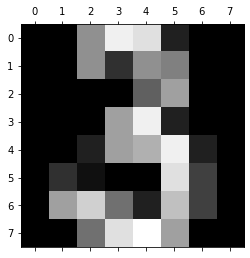

[[ 0.  0.  9. 15. 14.  2.  0.  0.]
 [ 0.  0.  9.  3.  9.  8.  0.  0.]
 [ 0.  0.  0.  0.  6. 10.  0.  0.]
 [ 0.  0.  0. 10. 15.  2.  0.  0.]
 [ 0.  0.  2. 10. 11. 15.  2.  0.]
 [ 0.  3.  1.  0.  0. 14.  4.  0.]
 [ 0. 10. 13.  7.  2. 12.  4.  0.]
 [ 0.  0.  7. 14. 16. 10.  0.  0.]]


In [ ]:
n=999
plt.gray()
plt.matshow(df.images[n])
plt.show()

print(df.images[n])

In [ ]:
X=df.images.reshape(dfImageLength,-1)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
Y=df.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(Y_train.shape)

(1347, 64)
(1347,)


In [ ]:
from sklearn.svm import SVC
svcModel=SVC(kernel='linear')
svcModel.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[2]


2


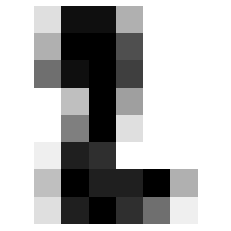

In [ ]:
n=243
result=svcModel.predict(df.images[n].reshape((1,-1)))
plt.imshow(df.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
print('%i' %result)
plt.show()

In [ ]:
Y_pred=svcModel.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [2 2]
 [8 8]
 [6 6]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm=confusion_matrix(Y_pred, Y_test)
print('Confusion Matrix')
print(cm)
print('Accuracy of the model')
print(accuracy_score(Y_pred,Y_test)*100)

Confusion Matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  1  0  3  0]
 [ 0  0 44  0  0  0  0  0  1  0]
 [ 0  0  0 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  1  0  1  0  0  0  0 44  1]
 [ 0  0  0  1  0  1  0  0  0 44]]
Accuracy of the model
97.11111111111111


In [ ]:
model1=SVC(kernel='rbf')
model2=SVC(gamma='auto')
model3=SVC(gamma=0.001)
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
print('Accuracy of linear kernel {}'.format(accuracy_score(Y_pred,Y_test)*100))
print('Accuracy of rbf kernel {}'.format(accuracy_score(pred1,Y_test)*100))
print('Accuracy of rbf kernel, gamma as auto {}'.format(accuracy_score(pred2,Y_test)*100))
print('Accuracy of rbf kernel, gamma as 0.001 {}'.format(accuracy_score(pred3,Y_test)*100))


Accuracy of linear kernel 97.11111111111111
Accuracy of rbf kernel 99.11111111111111
Accuracy of rbf kernel, gamma as auto 48.66666666666667
Accuracy of rbf kernel, gamma as 0.001 99.55555555555556
